# PROJET 4: Segmentez des clients d'un site e-commerce

# Partie 1:  Analyse Exploratoire et Feature Engineering

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#1)<a class="anchor" id="sommaire"></a>
## [ANALYSE DES DONNEES](#2)<a class="anchor" id="sommaire"></a>
## [MERGING ET FEATURE ENGINEERING](#3)<a class="anchor" id="sommaire"></a>
## [ANALYSE DES DONNEES](#4)<a class="anchor" id="sommaire"></a>

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="1"></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## [ANALYSE DES DONNEES](#sommaire)<a class="anchor" id="2"></a>

##### Fichier commandes

In [8]:
df_order=pd.read_csv('olist_orders_dataset.csv',sep=',')

In [9]:
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Le fichier des commandes contient chaque commandes avec un id des commandes, l'id client correspond à la commande, le status de la commande,ainsi que différentes données de temps correpondant à la date de commande, la date d'acceptation, de transmission au transporteur, de livraison et la data de livraison estimée.  

In [10]:
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])

In [11]:
df_order['order_date'] = df_order['order_purchase_timestamp'].dt.normalize()

In [12]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_date                          0
dtype: int64

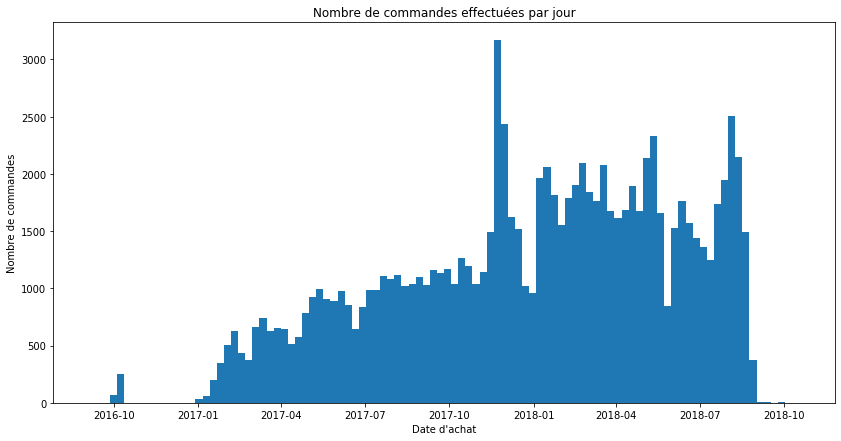

In [13]:
fig = plt.figure(figsize=(14, 7))
plt.hist(df_order['order_date'],bins=100)
plt.title('Nombre de commandes effectuées par jour')
plt.xlabel('Date d\'achat')
plt.ylabel('Nombre de commandes')
plt.show() 

On va déjà pouvoir réduire la plage de données utilisées en ne regardant que les données comprises entre le 1er janvier 2017 et octobre 2018

In [14]:
df_order=df_order[df_order['order_purchase_timestamp']>'2017-01-01']
df_order=df_order[df_order['order_purchase_timestamp']<'2018-10-01']
df_order['order_date'] = df_order['order_purchase_timestamp'].dt.normalize()

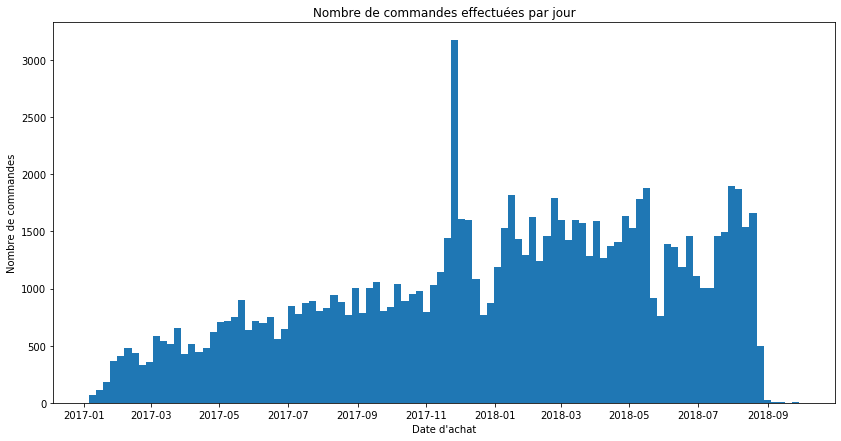

In [15]:
fig = plt.figure(figsize=(14, 7))
plt.hist(df_order['order_date'],bins=100)
plt.title('Nombre de commandes effectuées par jour')
plt.xlabel('Date d\'achat')
plt.ylabel('Nombre de commandes')
plt.show() 

On peut également afficher la durée de livraison des commandes

In [17]:
df_order['order_delivered_customer_date']=pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_delivered_customer_date']=df_order['order_delivered_customer_date'].dt.normalize()
df_order['delivery_time'] = df_order['order_delivered_customer_date']-df_order['order_purchase_timestamp']
df_order['delivery_time']=pd.to_timedelta(df_order['delivery_time'])

In [18]:
df_order['delivery_time']=df_order['delivery_time'].dt.days

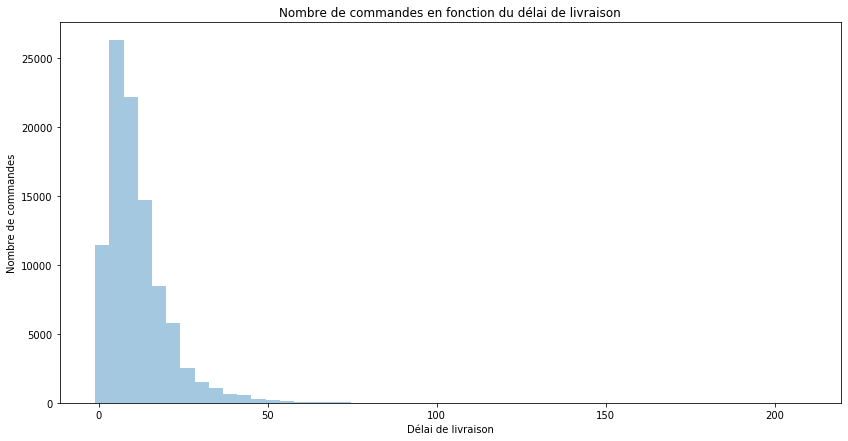

In [19]:
fig = plt.figure(figsize=(14, 7))
sns.distplot(df_order['delivery_time'].dropna(),kde=False)
plt.title('Nombre de commandes en fonction du délai de livraison')
plt.xlabel('Délai de livraison')
plt.ylabel('Nombre de commandes')
plt.show() 

A priori une majorité des commandes est livrée dans un délai correct mais nous avons des outliers avec certains colis livrés presque 200j plus tard

##### Fichier client

In [20]:
df_client=pd.read_csv('olist_customers_dataset.csv',sep=',')
df_loc=pd.read_csv('olist_geolocation_dataset.csv',sep=',')

In [21]:
df_client

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Le fichier client contient l'id client associé à la commande, l'id correspond à un client unique, son code postal, sa ville et l'état brésilien dans lequel il habite

In [22]:
TopCities = df_client['customer_city'].value_counts().sort_values(ascending=False)[:20]

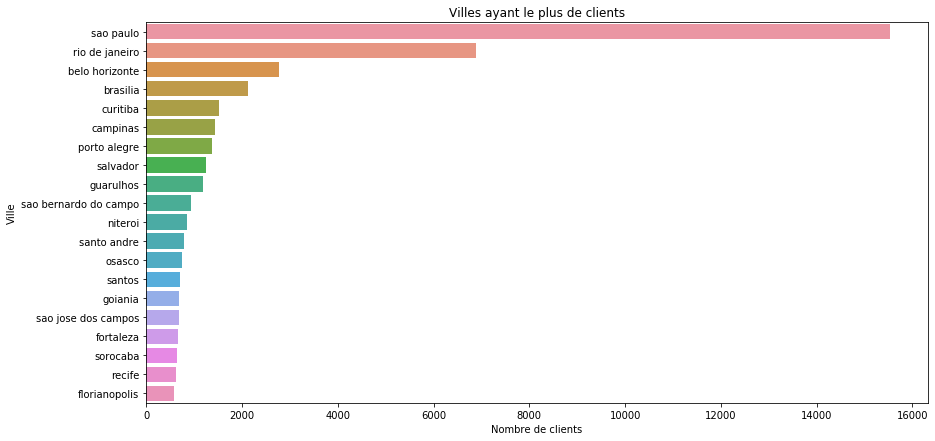

In [23]:
fig = plt.figure(figsize=(14, 7))
sns.barplot(y=TopCities.index,x=TopCities.values)
plt.title('Villes ayant le plus de clients')
plt.xlabel('Nombre de clients')
plt.ylabel('Ville')
plt.show() 

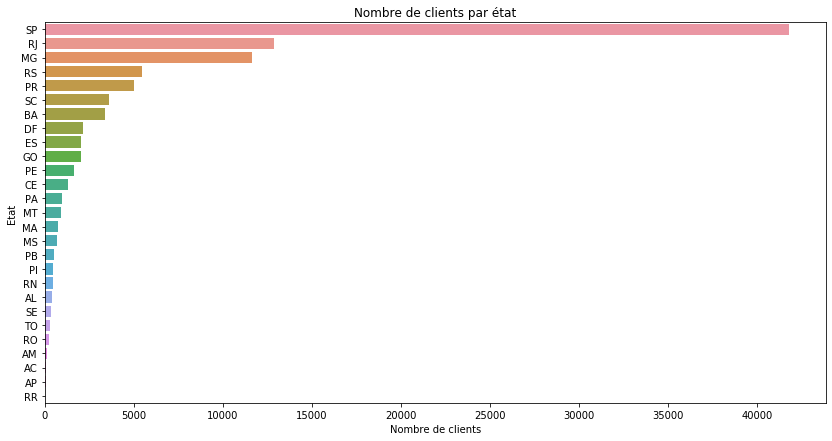

In [24]:
fig = plt.figure(figsize=(14, 7))
sns.barplot(y=df_client['customer_state'].value_counts().index,x=df_client['customer_state'].value_counts().values)
plt.title('Nombre de clients par état')
plt.xlabel('Nombre de clients')
plt.ylabel('Etat')
plt.show() 

##### Fichier vendeur

In [25]:
df_seller=pd.read_csv('olist_sellers_dataset.csv',sep=',')

In [26]:
df_seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Ce fichier est relativement similaire au fichier client avec beaucoup moins d'entrées puisque les vendeurs sont beaucoup moins nombreux.

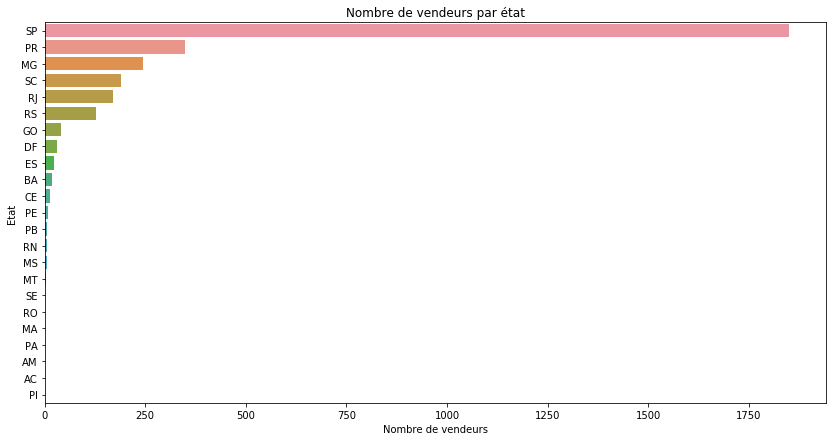

In [28]:
fig = plt.figure(figsize=(14, 7))
sns.barplot(y=df_seller['seller_state'].value_counts().index,x=df_seller['seller_state'].value_counts().values)
plt.title('Nombre de vendeurs par état')
plt.xlabel('Nombre de vendeurs')
plt.ylabel('Etat')
plt.show() 

##### Fichier Prix et Livraison

In [29]:
df_order_item=pd.read_csv('olist_order_items_dataset.csv',sep=',')


In [30]:
df_order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Il s'agit d'un fichier contenant l'id de la commande, le produit contenu, le vendeur, la date d'envoi ainsi que le prix sur site et le coût de la livraison.

In [34]:
df_order_item['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [35]:
df_order_item['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

Une information intéressante à avoir sera le prix total payé:


In [36]:
df_order_item['total']=df_order_item['price']+df_order_item['freight_value']

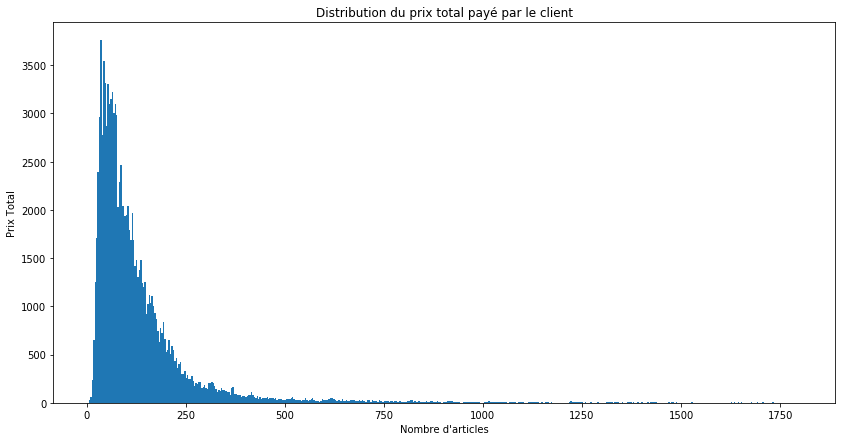

In [37]:
#On enlève les outliers >1800 pour avoir un meilleur aperçu
dfbis=df_order_item[df_order_item['total']<1800]
fig = plt.figure(figsize=(14, 7))
plt.hist(dfbis['total'],bins=500)
plt.title('Distribution du prix total payé par le client')
plt.xlabel('Nombre d\'articles')
plt.ylabel('Prix Total')
plt.show() 

##### Fichier produits

In [38]:
df_products=pd.read_csv('olist_products_dataset.csv',sep=',')


In [39]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Ce fichier contient les produits vendus par le site, avec le nom de la catégorie, les dimensions et le poids du produit, des informations sur la page du produit comme la longueur du nom et de la description ou le nombre de photos

Nous avons besoin du fichier traduction pour traduire le nom des catégories

In [40]:
df_translation=pd.read_csv('product_category_name_translation.csv',sep=',')
df_products=df_products.merge(df_translation,left_on='product_category_name',right_on='product_category_name')

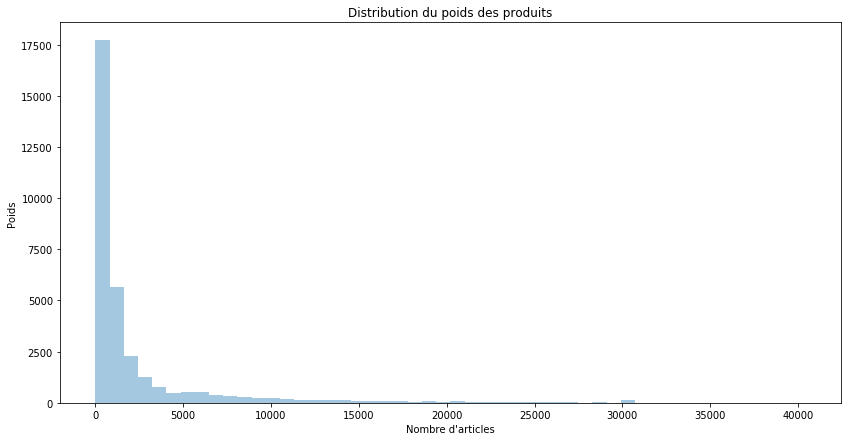

In [41]:
fig = plt.figure(figsize=(14, 7))
sns.distplot(df_products['product_weight_g'],kde=False)
plt.title('Distribution du poids des produits')
plt.xlabel('Nombre d\'articles')
plt.ylabel('Poids')
plt.show() 

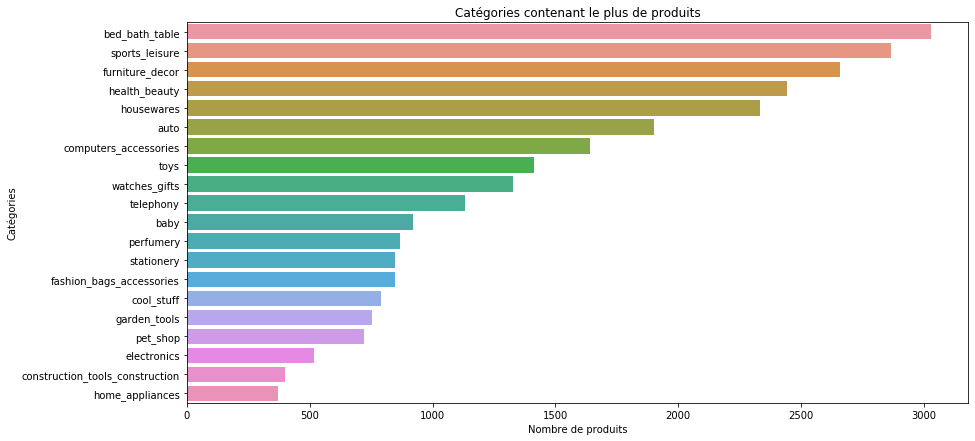

In [42]:
fig = plt.figure(figsize=(14, 7))
sns.barplot(y=df_products['product_category_name_english'].value_counts()[:20].index,x=df_products['product_category_name_english'].value_counts()[:20].values)
plt.title('Catégories contenant le plus de produits')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégories')
plt.show() 

##### Fichier paiement

In [43]:
df_payments=pd.read_csv('olist_order_payments_dataset.csv',sep=',')

In [44]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Ici nous avons le type de paiement choisi, le nombre de remboursements,ainsi que la valeur totale payée

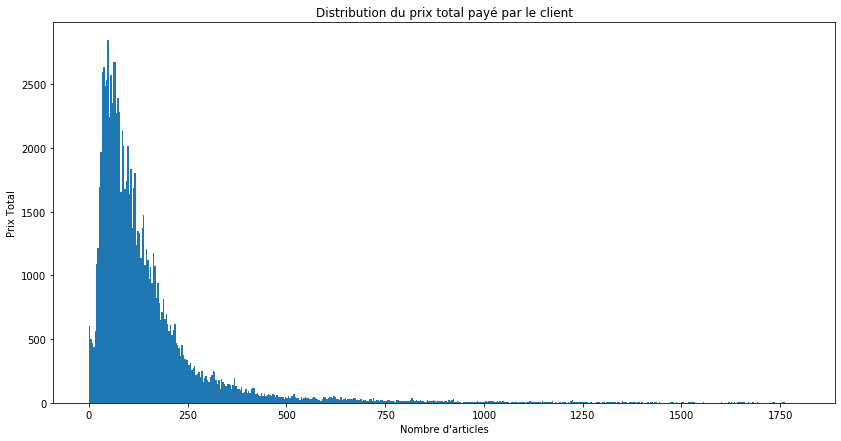

In [45]:
dfbis=df_payments[df_payments['payment_value']<1800]

fig = plt.figure(figsize=(14, 7))
plt.hist(dfbis['payment_value'],bins=500)
plt.title('Distribution du prix total payé par le client')
plt.xlabel('Nombre d\'articles')
plt.ylabel('Prix Total')
plt.show() 

La distribution semble relativement différente de la distribution du prix + du freight il faudra vérifier pourquoi. 

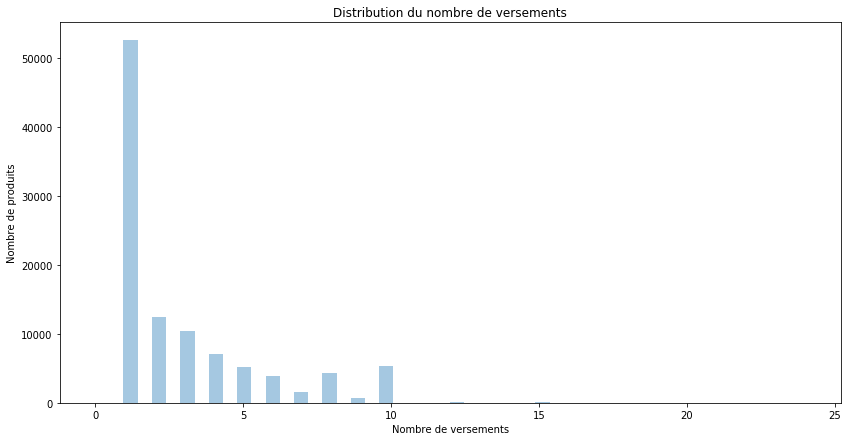

In [46]:
fig = plt.figure(figsize=(14, 7))
sns.distplot(df_payments['payment_installments'],kde=False)
plt.title('Distribution du nombre de versements')
plt.xlabel('Nombre de versements')
plt.ylabel('Nombre de produits')
plt.show() 

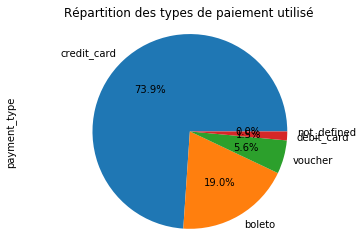

In [47]:
df_payments['payment_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Répartition des types de paiement utilisé')
plt.show() 

##### Fichier commentaires

In [48]:
df_reviews=pd.read_csv('olist_order_reviews_dataset.csv',sep=',')

In [49]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


Ici, nous avons le texte des reviews, le score donné par la review ainsi que les dates où elles ont été postées.


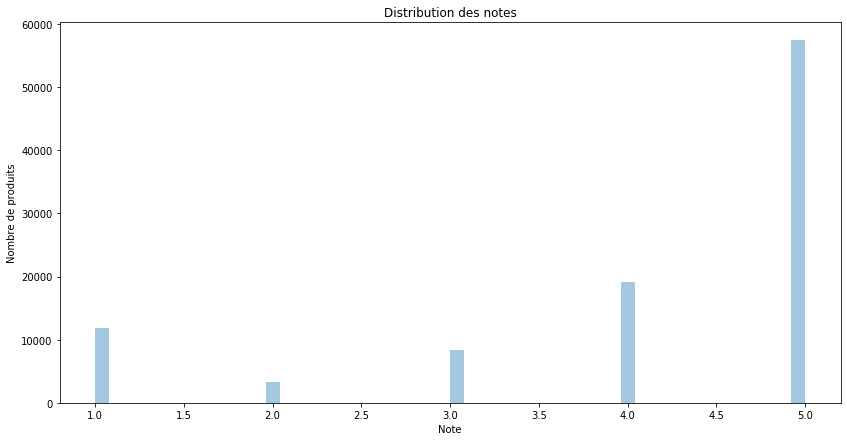

In [50]:
fig = plt.figure(figsize=(14, 7))
sns.distplot(df_reviews['review_score'],kde=False)
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de produits')
plt.show() 

## [MERGING ET FEATURE ENGINEERING](#sommaire)<a class="anchor" id="3"></a>

In [51]:
df=df_order.merge(df_client, left_on='customer_id', right_on='customer_id')
df=df.merge(df_order_item,left_on='order_id',right_on='order_id')
df=df.merge(df_products,left_on='product_id',right_on='product_id')
df=df.merge(df_seller,left_on='seller_id',right_on='seller_id')
df=df.merge(df_reviews,left_on='order_id',right_on='order_id')
df=df.merge(df_payments,left_on='order_id',right_on='order_id')

In [52]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,delivery_time,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18 00:00:00,2017-10-02,7.0,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18 00:00:00,2017-10-02,7.0,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18 00:00:00,2017-10-02,7.0,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18,2017-08-28 00:00:00,2017-08-15,2.0,...,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07,2017-08-15 00:00:00,2017-08-02,4.0,...,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116188,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09,2018-07-20 00:00:00,2018-07-01,7.0,...,7f9849fcbfdf9fa3070c05b5501bf066,5,NaN,NaN,2018-07-10 00:00:00,2018-07-10 18:32:29,1,boleto,1,93.13
116189,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaT,2017-03-30 00:00:00,2017-03-11,NaN,...,c950324a42c5796d06f569f77d8b2e88,1,NaN,NaN,2017-04-01 00:00:00,2017-04-01 10:24:03,1,credit_card,1,30.66
116190,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02,2018-08-16 00:00:00,2018-07-24,8.0,...,19f21ead7ffe5b1b5147a7877c22bae5,5,NaN,NaN,2018-08-03 00:00:00,2018-08-04 11:22:40,1,debit_card,1,444.07
116191,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12,2018-06-08 00:00:00,2018-05-22,20.0,...,ec2817e750153dfdd61894780dfc5d9e,4,NaN,NaN,2018-06-10 00:00:00,2018-06-13 09:17:47,1,credit_card,4,244.02


In [53]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_date', 'delivery_time', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'total', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
     

Transformation des données temporelles

In [54]:
dates=['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in dates:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [55]:
df['month of purchase'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['day_of_purchase'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['hour of purchase'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['month_and_year'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [56]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,delivery_time,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,month of purchase,day_of_purchase,hour of purchase,month_and_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,2017-10-02,7.0,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,10,0,10,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,2017-10-02,7.0,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,10,0,10,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,2017-10-02,7.0,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,10,0,10,201710
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18,2017-08-28,2017-08-15,2.0,...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,8,1,18,201708
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07,2017-08-15,2017-08-02,4.0,...,2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,8,2,18,201708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116188,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09,2018-07-20,2018-07-01,7.0,...,2018-07-10 00:00:00,2018-07-10 18:32:29,1,boleto,1,93.13,7,6,10,201807
116189,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,2017-03-11,NaN,...,2017-04-01 00:00:00,2017-04-01 10:24:03,1,credit_card,1,30.66,3,5,19,201703
116190,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02,2018-08-16,2018-07-24,8.0,...,2018-08-03 00:00:00,2018-08-04 11:22:40,1,debit_card,1,444.07,7,1,9,201807
116191,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12,2018-06-08,2018-05-22,20.0,...,2018-06-10 00:00:00,2018-06-13 09:17:47,1,credit_card,4,244.02,5,1,21,201805


Modification payment_value

Sur certaines commandes, le nombre de paiements par articles est divisée en un certain nombre de versements. Il faut donc extraire le nombre de ces versements, puis en déduire le nombre de produits achetés réellement et le montant payé en tout pour chaque article 

In [327]:
# Calcul du nombre d'articles individuels dans chaque commande
t=df_order_item.groupby(['order_id','product_id','freight_value','total'],as_index=False)['price'].count().rename(columns={'price':'Number_of_articles'})
#Récupération du temps de commande par le client
g=df.groupby(['order_id','order_purchase_timestamp'],as_index=False)['price'].max()
g=g.drop(columns=['price'])
#Ajout de l'id client
f=df.groupby(['customer_unique_id','order_id'],as_index=False)['price'].max()
f=f.drop(columns=['price'])
#Merge
h=t.merge(g,right_on='order_id',left_on='order_id')
h=h.merge(f,right_on='order_id',left_on='order_id')
#h=t.merge(g.drop(columns=['price']),right_on='order_id',left_on='order_id')
# Merge des tables pour calculer le nombre d'articles achetés
#h=g.merge(b,right_on='order_id',left_on='order_id')
#t=df_order_item.groupby(['order_id','product_id'],as_index=False)['price'].count()
#h=h.merge(t,right_on='order_id',left_on='order_id').rename(columns={'price':'Number_articles'})
#Calcul du prix de chaque article dans chaque commande
#c=df_order_item.groupby(['order_id','product_id'],as_index=False)['price'].max()
# Transfert dans la table précédente
#h['total_price_per_article']=c['total']
#Calcul du montant payé en tout pour chaque article
#h['total']=h['total_price_per_article']*h['Number_of_articles']
#Calcul du freight total par article
#h['freight_total']=h['freight_value']*h['Number_of_articles']


In [328]:
h

,order_id,product_id,freight_value,total,Number_of_articles,order_purchase_timestamp,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,13.29,72.19,1,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,19.93,259.83,1,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,17.87,216.87,1,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.79,25.78,1,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,18.14,218.04,1,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...,...,...,...
100673,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,43.41,343.40,1,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64
100674,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,36.53,386.53,1,2018-07-14 10:26:46,0da9fe112eae0c74d3ba1fe16de0988b
100675,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,16.95,116.85,1,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4
100676,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,8.72,64.71,1,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306


Nous allons visualiser les données manquantes

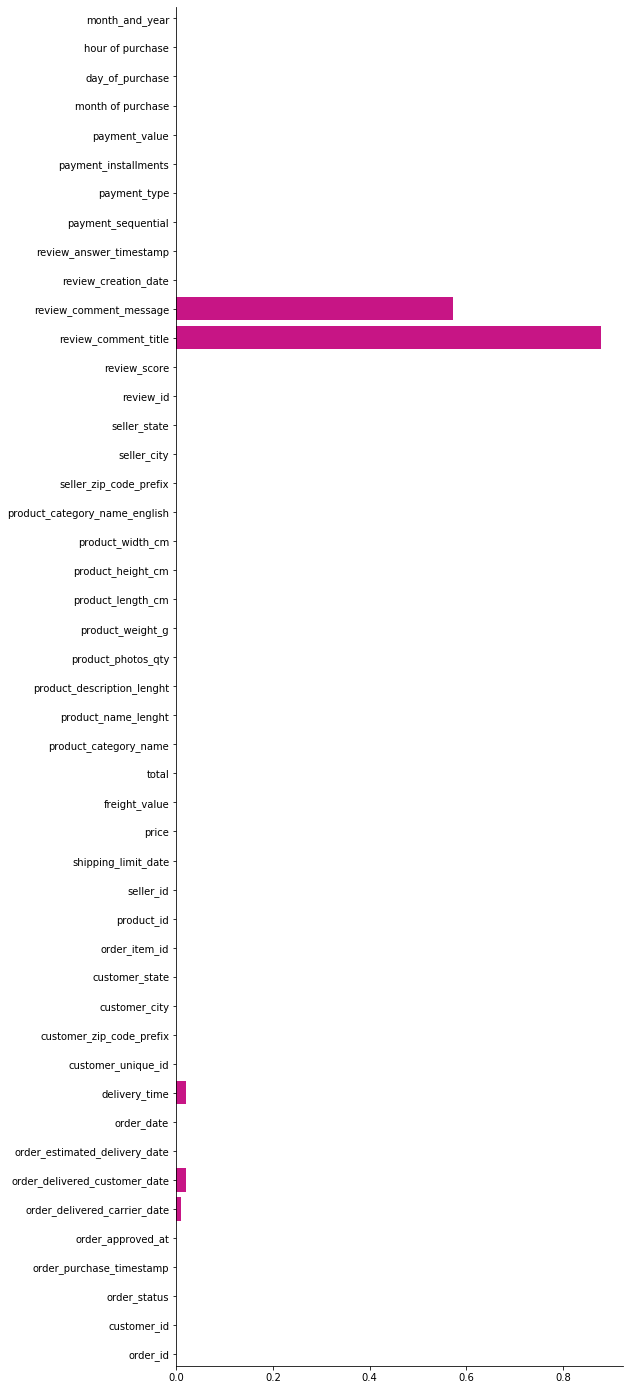

In [329]:
# Proportion de valeurs manquantes par colonne
null_counts = df.isnull().mean(axis=0)

# barplot des valeurs manquantes par colonne
fig = plt.figure(figsize=(8,25))
plt.barh(np.arange(len(null_counts)),null_counts, color="mediumvioletred")
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)

Nous avons peu de données manquantes

##### Création d'un fichier client 

Nous allons agréger les données par client unique

Nombre de produits achetés

In [330]:
dfclient=h.groupby(['customer_unique_id'],as_index=False)['Number_of_articles'].sum()

In [331]:
dfclient['Number_of_articles'].value_counts()

1     82120
2      8847
3      1645
4       619
5       253
6       192
7        45
8        16
9        11
10       11
11       10
12        9
14        3
15        3
13        2
20        2
21        1
18        1
24        1
Name: Number_of_articles, dtype: int64

Nombre de produits distincts

In [332]:
df_prod_distincts=h.groupby(['customer_unique_id'],as_index=False)['Number_of_articles'].count().rename(columns={'Number_of_articles':'Number_of_different_articles'})

In [333]:
df_prod_distincts

,customer_unique_id,Number_of_different_articles
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93786,fffcf5a5ff07b0908bd4e2dbc735a684,2
93787,fffea47cd6d3cc0a88bd621562a9d061,1
93788,ffff371b4d645b6ecea244b27531430a,1
93789,ffff5962728ec6157033ef9805bacc48,1


In [334]:
dfclient=dfclient.merge(df_prod_distincts,left_on='customer_unique_id',right_on='customer_unique_id')

Temps de livraison moyen

In [335]:
dfbis=df.groupby(['customer_unique_id'])['delivery_time'].mean()

In [336]:
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

In [337]:
dfclient

,customer_unique_id,Number_of_articles,Number_of_different_articles,delivery_time
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,2.0
2,0000f46a3911fa3c0805444483337064,1,1,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,19.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,12.0
...,...,...,...,...
93786,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,27.0
93787,fffea47cd6d3cc0a88bd621562a9d061,1,1,29.0
93788,ffff371b4d645b6ecea244b27531430a,1,1,14.0
93789,ffff5962728ec6157033ef9805bacc48,1,1,11.0


Note moyenne

In [338]:
dfbis=df.groupby(['customer_unique_id'])['review_score'].mean()
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

Ville de résidence

In [339]:
dfbis=df.groupby(['customer_unique_id','customer_city'],as_index=False)['review_score'].count()


In [340]:
dfbis=pd.DataFrame(dfbis).drop(columns=['review_score'],axis=1).drop_duplicates(subset=['customer_unique_id'])

In [341]:
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

In [342]:
dfclient

,customer_unique_id,Number_of_articles,Number_of_different_articles,delivery_time,review_score,customer_city
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,5.0,5.0,cajamar
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,2.0,4.0,osasco
2,0000f46a3911fa3c0805444483337064,1,1,25.0,3.0,sao jose
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,19.0,4.0,belem
4,0004aac84e0df4da2b147fca70cf8255,1,1,12.0,5.0,sorocaba
...,...,...,...,...,...,...
93786,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,27.0,5.0,sanharo
93787,fffea47cd6d3cc0a88bd621562a9d061,1,1,29.0,4.0,feira de santana
93788,ffff371b4d645b6ecea244b27531430a,1,1,14.0,5.0,sinop
93789,ffff5962728ec6157033ef9805bacc48,1,1,11.0,5.0,bom jesus do norte


Montant dépensé

In [343]:
h['total_article']=h['Number_of_articles']*h['total']
h['total_freight']=h['Number_of_articles']*h['freight_value']

In [344]:
dfbisfreight=h.groupby(['customer_unique_id'],as_index=False)['total_freight'].sum()
dfbistotal=h.groupby(['customer_unique_id'],as_index=False)['total_article'].sum()

In [345]:
dfclient=dfclient.merge(dfbisfreight,left_on='customer_unique_id',right_on='customer_unique_id')
dfclient=dfclient.merge(dfbistotal,left_on='customer_unique_id',right_on='customer_unique_id')

Freight ratio

In [346]:
dfclient['freight_ratio']=dfclient['total_freight']/dfclient['total_article']

Somme dépensée par catégorie

In [347]:
hproduct=h.merge(df_products,right_on='product_id',left_on='product_id')

In [348]:
dfbis=hproduct.groupby(['customer_unique_id','product_category_name_english'],as_index=False)['total_article'].sum()

In [349]:
dfbis=pd.pivot_table(dfbis,index='customer_unique_id',values='total_article',columns='product_category_name_english').fillna(0)

In [350]:
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

Most_recent_purchase

In [351]:
dfbis=h.groupby(['customer_unique_id'],as_index=False)['order_purchase_timestamp'].max()

In [352]:
k=dfbis['order_purchase_timestamp'].max()

In [353]:
dfbis['Recent_Purchase']=(k-dfbis['order_purchase_timestamp'])

In [354]:
dfbis['Days_since_Purchase']=dfbis.Recent_Purchase.apply(lambda x:x.days)

In [355]:
dfclient=dfclient.merge(dfbis.drop(columns=['order_purchase_timestamp','Recent_Purchase']),right_on='customer_unique_id',left_on='customer_unique_id')

Nombre de photos des produits achetés

In [356]:
dfbis=hproduct.groupby(['customer_unique_id'],as_index=False)['product_photos_qty'].mean()

In [357]:
dfbis=hproduct.groupby(['customer_unique_id'],as_index=False)['product_photos_qty'].mean()
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')
dfbis=hproduct.groupby(['customer_unique_id'],as_index=False)['product_weight_g'].mean()
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

In [358]:
liste=df['product_category_name_english'].value_counts().index[:]

Ajout des heures d'achat

In [359]:
dfbis=h.groupby(['customer_unique_id','order_purchase_timestamp'],as_index=False)['total'].mean()

In [360]:
dfbis['hour_purchase']=dfbis.order_purchase_timestamp.apply(lambda x:x.hour)

In [361]:
dfbis=dfbis.groupby(['customer_unique_id'],as_index=False)['time'].mean()

In [362]:
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

In [363]:
dfclient.drop(columns=liste)

,customer_unique_id,Number_of_articles,Number_of_different_articles,delivery_time,review_score,customer_city,total_freight,total_article,freight_ratio,Days_since_Purchase,product_photos_qty,product_weight_g,time
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,5.0,5.0,cajamar,12.00,141.90,0.084567,115,1.0,1500.0,10.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,2.0,4.0,osasco,8.29,27.19,0.304892,118,1.0,375.0,11.0
2,0000f46a3911fa3c0805444483337064,1,1,25.0,3.0,sao jose,17.22,86.22,0.199722,541,3.0,1500.0,21.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,19.0,4.0,belem,17.63,43.62,0.404172,325,5.0,150.0,20.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,12.0,5.0,sorocaba,16.89,196.89,0.085784,292,3.0,6050.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93786,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,27.0,5.0,sanharo,497.42,2067.42,0.240599,451,1.0,30000.0,21.0
93787,fffea47cd6d3cc0a88bd621562a9d061,1,1,29.0,4.0,feira de santana,19.69,84.58,0.232797,266,2.0,1720.0,20.0
93788,ffff371b4d645b6ecea244b27531430a,1,1,14.0,5.0,sinop,22.56,112.46,0.200605,572,5.0,600.0,15.0
93789,ffff5962728ec6157033ef9805bacc48,1,1,11.0,5.0,bom jesus do norte,18.69,133.69,0.139801,123,3.0,444.0,15.0


Ajout du mois d'achat

In [431]:
dfbis=h.groupby(['customer_unique_id','order_purchase_timestamp'],as_index=False)['total'].mean()

In [432]:
dfbis['month_purchase']=dfbis.order_purchase_timestamp.apply(lambda x:x.month)

In [433]:
dfbis=dfbis.groupby(['customer_unique_id'],as_index=False)['month_purchase'].mean()

In [434]:
dfclient=dfclient.merge(dfbis,left_on='customer_unique_id',right_on='customer_unique_id')

In [435]:
dfclient

,customer_unique_id,Number_of_articles,Number_of_different_articles,delivery_time,review_score,customer_city,total_freight,total_article,freight_ratio,agro_industry_and_commerce,...,stationery,tablets_printing_image,telephony,toys,watches_gifts,Days_since_Purchase,product_photos_qty,product_weight_g,time,month_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,5.0,5.0,cajamar,12.00,141.90,0.084567,0.0,...,0.00,0.0,0.00,0.0,0.00,115,1.0,1500.0,10.0,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,2.0,4.0,osasco,8.29,27.19,0.304892,0.0,...,0.00,0.0,0.00,0.0,0.00,118,1.0,375.0,11.0,5.0
2,0000f46a3911fa3c0805444483337064,1,1,25.0,3.0,sao jose,17.22,86.22,0.199722,0.0,...,86.22,0.0,0.00,0.0,0.00,541,3.0,1500.0,21.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,19.0,4.0,belem,17.63,43.62,0.404172,0.0,...,0.00,0.0,43.62,0.0,0.00,325,5.0,150.0,20.0,10.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,12.0,5.0,sorocaba,16.89,196.89,0.085784,0.0,...,0.00,0.0,196.89,0.0,0.00,292,3.0,6050.0,19.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91814,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,27.0,5.0,sanharo,497.42,2067.42,0.240599,0.0,...,0.00,0.0,0.00,0.0,0.00,451,1.0,30000.0,21.0,6.0
91815,fffea47cd6d3cc0a88bd621562a9d061,1,1,29.0,4.0,feira de santana,19.69,84.58,0.232797,0.0,...,0.00,0.0,0.00,0.0,0.00,266,2.0,1720.0,20.0,12.0
91816,ffff371b4d645b6ecea244b27531430a,1,1,14.0,5.0,sinop,22.56,112.46,0.200605,0.0,...,0.00,0.0,0.00,0.0,0.00,572,5.0,600.0,15.0,2.0
91817,ffff5962728ec6157033ef9805bacc48,1,1,11.0,5.0,bom jesus do norte,18.69,133.69,0.139801,0.0,...,0.00,0.0,0.00,0.0,133.69,123,3.0,444.0,15.0,5.0


## [ANALYSE DES DONNEES](#sommaire)<a class="anchor" id="4"></a>

Visualisation Matrice des Corrélations

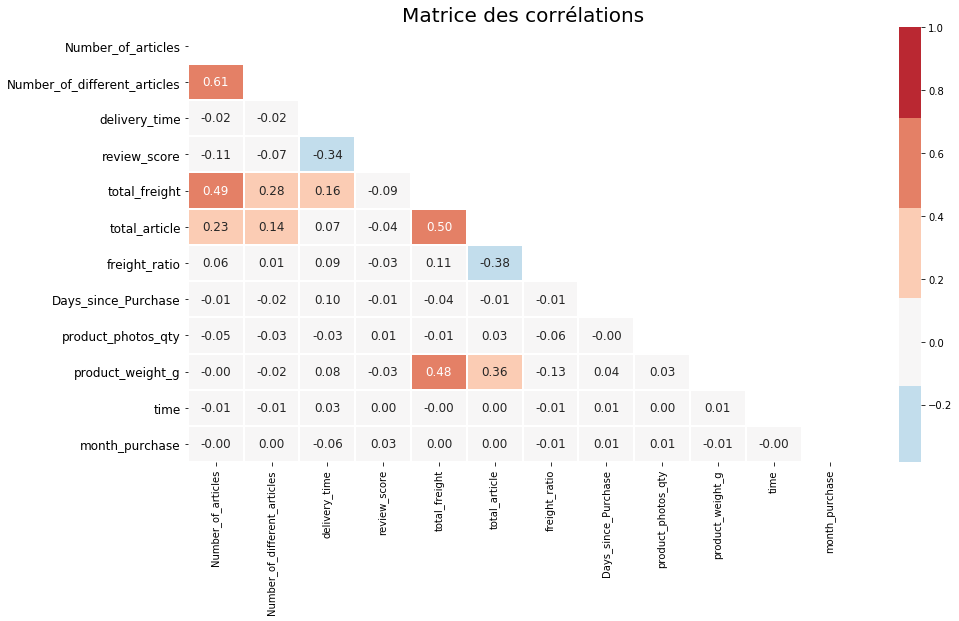

In [436]:
corr = dfclient.drop(columns=liste).corr()

# heatmap de la matrice de corrélation
plt.figure(figsize=(15,8))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, cmap=sns.color_palette("RdBu_r", 7), linewidths=1, 
            annot=True, annot_kws={"size":12}, fmt=".02f")

plt.title('Matrice des corrélations', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=12,rotation=0)
plt.show()

In [437]:
dfclient.to_csv('fichier_client.csv')

Determination des coefficient de skewness pour preprocessing

Variables non catégorielles

In [438]:
visu=dfclient.drop(columns=liste).drop(columns=['customer_unique_id','customer_city'])

In [439]:
visu.columns

Index(['Number_of_articles', 'Number_of_different_articles', 'delivery_time',
       'review_score', 'total_freight', 'total_article', 'freight_ratio',
       'Days_since_Purchase', 'product_photos_qty', 'product_weight_g', 'time',
       'month_purchase'],
      dtype='object')

In [452]:
skewl=[]
skewl2=[]

In [454]:
import scipy.stats
for i in visu.columns:
    skewp=scipy.stats.skew(visu[i])
    skewl2.append(skewp)
    if np.abs(skewp)>2.5:
        print('Skewness of '+str(i)+' ='+str(skewp))
        skewl.append(i)

Skewness of Number_of_articles =7.426690173578684
Skewness of Number_of_different_articles =7.274237129458072
Skewness of delivery_time =3.891554892161111
Skewness of total_freight =11.850033861480854
Skewness of total_article =9.24575929879596
Skewness of product_weight_g =3.5947085193028365


Nous avons 6 variables qui peuvent être transformées pour avoir de meilleurs résultats lors de l'analyse

In [455]:
for i in dfclient[liste].columns:
    skewp=scipy.stats.skew(dfclient[i])
    if np.abs(skewp)>2.5:
        print('Skewness of '+str(i)+' ='+str(skewp))
        skewl.append(i)

Skewness of bed_bath_table =9.739076312362393
Skewness of health_beauty =12.090596287711197
Skewness of sports_leisure =18.445430922434873
Skewness of furniture_decor =11.98898022051443
Skewness of computers_accessories =19.642450349734965
Skewness of housewares =34.12299928878219
Skewness of watches_gifts =14.078617463294773
Skewness of telephony =35.7676275598943
Skewness of garden_tools =25.74253863355644
Skewness of auto =20.747492338103644
Skewness of toys =14.137145393147556
Skewness of cool_stuff =17.02382045928396
Skewness of perfumery =9.809231924574677
Skewness of baby =26.02278846816512
Skewness of electronics =47.411466648649494
Skewness of stationery =16.6815318473787
Skewness of fashion_bags_accessories =35.378615140341125
Skewness of pet_shop =28.580003697229944
Skewness of office_furniture =21.510090656754468
Skewness of consoles_games =53.68597114717948
Skewness of luggage_accessories =21.306666451831372
Skewness of construction_tools_construction =37.60370798360577
Sk

In [451]:
skewp

237.49436783344763

Variables catégorielles

In [443]:
dfclient

,customer_unique_id,Number_of_articles,Number_of_different_articles,delivery_time,review_score,customer_city,total_freight,total_article,freight_ratio,agro_industry_and_commerce,...,stationery,tablets_printing_image,telephony,toys,watches_gifts,Days_since_Purchase,product_photos_qty,product_weight_g,time,month_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,5.0,5.0,cajamar,12.00,141.90,0.084567,0.0,...,0.00,0.0,0.00,0.0,0.00,115,1.0,1500.0,10.0,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,2.0,4.0,osasco,8.29,27.19,0.304892,0.0,...,0.00,0.0,0.00,0.0,0.00,118,1.0,375.0,11.0,5.0
2,0000f46a3911fa3c0805444483337064,1,1,25.0,3.0,sao jose,17.22,86.22,0.199722,0.0,...,86.22,0.0,0.00,0.0,0.00,541,3.0,1500.0,21.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,19.0,4.0,belem,17.63,43.62,0.404172,0.0,...,0.00,0.0,43.62,0.0,0.00,325,5.0,150.0,20.0,10.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,12.0,5.0,sorocaba,16.89,196.89,0.085784,0.0,...,0.00,0.0,196.89,0.0,0.00,292,3.0,6050.0,19.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91814,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,27.0,5.0,sanharo,497.42,2067.42,0.240599,0.0,...,0.00,0.0,0.00,0.0,0.00,451,1.0,30000.0,21.0,6.0
91815,fffea47cd6d3cc0a88bd621562a9d061,1,1,29.0,4.0,feira de santana,19.69,84.58,0.232797,0.0,...,0.00,0.0,0.00,0.0,0.00,266,2.0,1720.0,20.0,12.0
91816,ffff371b4d645b6ecea244b27531430a,1,1,14.0,5.0,sinop,22.56,112.46,0.200605,0.0,...,0.00,0.0,0.00,0.0,0.00,572,5.0,600.0,15.0,2.0
91817,ffff5962728ec6157033ef9805bacc48,1,1,11.0,5.0,bom jesus do norte,18.69,133.69,0.139801,0.0,...,0.00,0.0,0.00,0.0,133.69,123,3.0,444.0,15.0,5.0


In [444]:
#for i in skewl:
 #   for j in dfclient.index:
  #      dfclient.loc[j,i]=np.log(dfclient.loc[j,i]+1)

Preprocessing sur skewed variables:


In [445]:
dfclient2=dfclient

In [446]:
X=dfclient[skewl]
X2=dfclient.drop(columns=skewl)

In [447]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.abs, validate=True)
transformer2 = FunctionTransformer(np.log1p, validate=True)
X=transformer.transform(X)
X=transformer2.transform(X)

In [448]:
X2=X2.reset_index().drop(columns=['index'])
dfclient3=pd.DataFrame(X,columns=skewl)
dfclientprocessed=X2.merge(dfclient3,left_index=True, right_index=True)

In [449]:
dfclientprocessed

,customer_unique_id,review_score,customer_city,freight_ratio,Days_since_Purchase,product_photos_qty,time,month_purchase,Number_of_articles,Number_of_different_articles,...,music,diapers_and_hygiene,flowers,fashion_sport,home_comfort_2,arts_and_craftmanship,la_cuisine,cds_dvds_musicals,fashion_childrens_clothes,security_and_services
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,cajamar,0.084567,115,1.0,10.0,5.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,osasco,0.304892,118,1.0,11.0,5.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,3.0,sao jose,0.199722,541,3.0,21.0,3.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,belem,0.404172,325,5.0,20.0,10.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,5.0,sorocaba,0.085784,292,3.0,19.0,11.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91814,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,sanharo,0.240599,451,1.0,21.0,6.0,1.098612,1.098612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91815,fffea47cd6d3cc0a88bd621562a9d061,4.0,feira de santana,0.232797,266,2.0,20.0,12.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91816,ffff371b4d645b6ecea244b27531430a,5.0,sinop,0.200605,572,5.0,15.0,2.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91817,ffff5962728ec6157033ef9805bacc48,5.0,bom jesus do norte,0.139801,123,3.0,15.0,5.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualisation variables catégories

In [450]:
dfclientprocessed.to_csv('fichier_client_processed.csv')